In [1]:
# This material, largely inspired: by https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from numpy import loadtxt
from utils import loadMnist

Using TensorFlow backend.


In [3]:


# Make training and test data
n_instances = 1000
X, y = loadMnist('testing')
X_train = X[:n_instances].astype('float32')
y_train = y[:n_instances].astype('float32')
# use as a validation set
X_test = X[n_instances:].astype('float32')
y_test = y[n_instances:].astype('float32')


# this is the size of our encoded representations
encoding_dim = 2
batch_size   = 32
nb_epochs    = 100
decoding_dim = X.shape[1]

# TODO
inpt = Input(shape=(decoding_dim,))
dnse = Dense(encoding_dim, activation='relu')(inpt)
outp = Dense(decoding_dim, activation='sigmoid')(dnse)

autoencoder = Model(inpt, outp)
encoder     = Model(inpt, dnse)

autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

autoencoder.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test))

Z = encoder.predict(X)

Train on 1000 samples, validate on 9000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 401us/step - loss: 0.6893 - val_loss: 0.6829
Epoch 2/100
1000/1000 [==============================] - 0s 181us/step - loss: 0.6507 - val_loss: 0.5679
Epoch 3/100
1000/1000 [==============================] - 0s 190us/step - loss: 0.4397 - val_loss: 0.3353
Epoch 4/100
1000/1000 [==============================] - 0s 183us/step - loss: 0.3035 - val_loss: 0.2955
Epoch 5/100
1000/1000 [==============================] - 0s 180us/step - loss: 0.2798 - val_loss: 0.2878
Epoch 6/100
1000/1000 [==============================] - 0s 183us/step - loss: 0.2728 - val_loss: 0.2840
Epoch 7/100
1000/1000 [==============================] - 0s 178us/step - loss: 0.2694 - val_loss: 0.2819
Epoch 8/100
1000/1000 [==============================] - 0s 184us/step - loss: 0.2674 - val_loss: 0.2804
Epoch 9/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2659 - val_loss: 0.2797
Epoch 1

Epoch 78/100
1000/1000 [==============================] - 0s 190us/step - loss: 0.2392 - val_loss: 0.2563
Epoch 79/100
1000/1000 [==============================] - 0s 177us/step - loss: 0.2391 - val_loss: 0.2560
Epoch 80/100
1000/1000 [==============================] - 0s 177us/step - loss: 0.2390 - val_loss: 0.2562
Epoch 81/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2389 - val_loss: 0.2563
Epoch 82/100
1000/1000 [==============================] - 0s 177us/step - loss: 0.2388 - val_loss: 0.2556
Epoch 83/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2388 - val_loss: 0.2556
Epoch 84/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2387 - val_loss: 0.2556
Epoch 85/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2386 - val_loss: 0.2558
Epoch 86/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.2385 - val_loss: 0.2554
Epoch 87/100
1000/1000 [======================

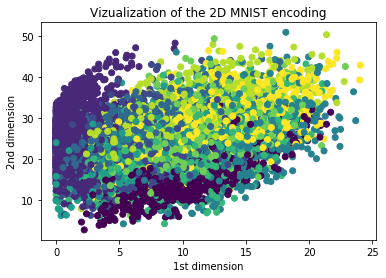

In [4]:
# Plot clustering results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z[:,0],Z[:,1], c=y)
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_title("Vizualization of the 2D MNIST encoding")
plt.show()